In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


In [91]:
def remove_white_border (image):
    rowSize = image.shape[0]
    colsize = image.shape[1]
    up_left = [-1,-1]
    down_right = [-1,-1]
    for row in range(rowSize):
        for col in range(colsize):
            if  up_left[0] > -1:
                if image[row,col] < 50 and (image[row-100,col] < 50) and (image[row,col-100] < 50):
                    down_right = [row,col]
            else:
                if (image[row,col] < 50) and (image[row,col+100] < 50) and (image[row+100,col] < 50):
                    up_left = [row,col]
    result = image [up_left[0]:down_right[0], up_left[1]:down_right[1] ]
    return result

def remove_Black_border (image):
    rowSize = image.shape[0]
    colsize = image.shape[1]
    
    for i in range(15):      
        for j in range(colsize):                
            image[i,j] = 255
            image[rowSize-1-i,j] = 255
    for i in range(rowSize):
        for j in range(15):
            image[i,j] = 255    
            image[i,colsize-1-j] = 255                
    return image

def check_black_pixel_percentage (image):
    rowSize = image.shape[0]
    colsize = image.shape[1]  
    black_pixel = 0
    totalPixel = rowSize*colsize

    for row in range(rowSize):
        for col in range(colsize):
            if image[row,col] < 50:
                black_pixel = black_pixel + 1
    return ( black_pixel / totalPixel ) * 100
    




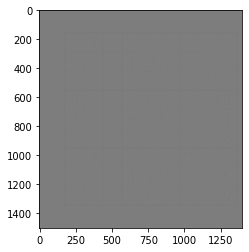

In [3]:
img_sudoku = cv2.imread('sudoku.tif') 
img_sudoku = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2GRAY)

plt.imshow( img_sudoku , cmap = 'gray')


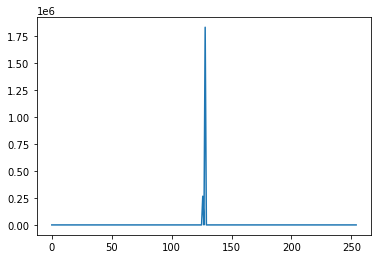

In [4]:
hist  = cv2.calcHist ([img_sudoku] , [0] , None , [255] , [0, 255])
plt.plot(hist)

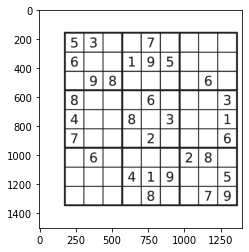

In [5]:
optimized = cv2.equalizeHist(img_sudoku)
plt.imshow(optimized, cmap = 'gray')


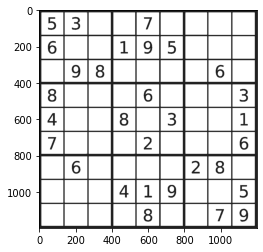

In [6]:
Final = remove_white_border(optimized)
plt.imshow(Final, cmap = 'gray')

In [93]:
splitedResult = []

rowSplited = np.array_split(Final, 9)
for i in range(9):
    colSplitedInRow = np.array_split(rowSplited[i], 9, 1)
    for j in range(9):
        clean_cel = remove_Black_border(colSplitedInRow[j])
        #splitedResult = splitedResult + clean_cel
        name = "All_Splitted_Pic/" + str(i)+str(j)+".jpg"
        cv2.imwrite(name, clean_cel )
        precentage = check_black_pixel_percentage(clean_cel)
        if precentage > 4:
            name = "All_Pic_By_Number/" + str(i)+str(j)+".jpg"
            cv2.imwrite(name, clean_cel )            